# Загрузка датасета

In [ ]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
100% 70.6k/70.6k [00:00<00:00, 322kB/s]
100% 70.6k/70.6k [00:00<00:00, 322kB/s]


In [ ]:
!unzip /content/mobile-price-classification.zip

Archive:  /content/mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
df_path = "/content/train.csv"
phone_df = pd.read_csv(df_path)

In [ ]:
phone_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Обзор данных:**

battery_power: Энергия, которую аккумулятор может хранить, измеряется в мАч

blue: Есть Bluetooth или нет

clock_speed: Скорость, с которой микропроцессор выполняет инструкции

dual_sim: Есть поддержка двух SIM-карт или нет

fc: Мегапиксели фронтальной камеры

four_g: Есть 4G или нет

int_memory: Внутренняя память в гигабайтах

m_dep: Толщина мобильного телефона в см

mobile_wt: Вес мобильного телефона

n_cores: Количество ядер процессора

pc: Мегапиксели основной камеры

px_height: Разрешение экрана в пикселях по высоте

px_width: Разрешение экрана в пикселях по ширине

ram: Скорость оперативной памяти

sc_h: Высота экрана в см

sc_w: Ширина экрана в см

talk_time:: Максимальное время работы от одного заряда батареи, когда вы

three_g: Есть 3G или нет

touch_screen: Есть сенсорный экран или нет

wifi: Есть Wi-Fi или нет

price_range: диапазон цен (наша цель)

**0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость)**

In [ ]:
phone_df["price_range"].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X1, y1 = phone_df.iloc[:, :-1], phone_df.iloc[:, -1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

# Рещающее дерево

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X1_train, y1_train)
tree_pred_res = tree_clf.predict(X1_test)
tree_accuracy = accuracy_score(y1_test, tree_pred_res)

print(f'tree accuracy: {tree_accuracy}')

tree accuracy: 0.824


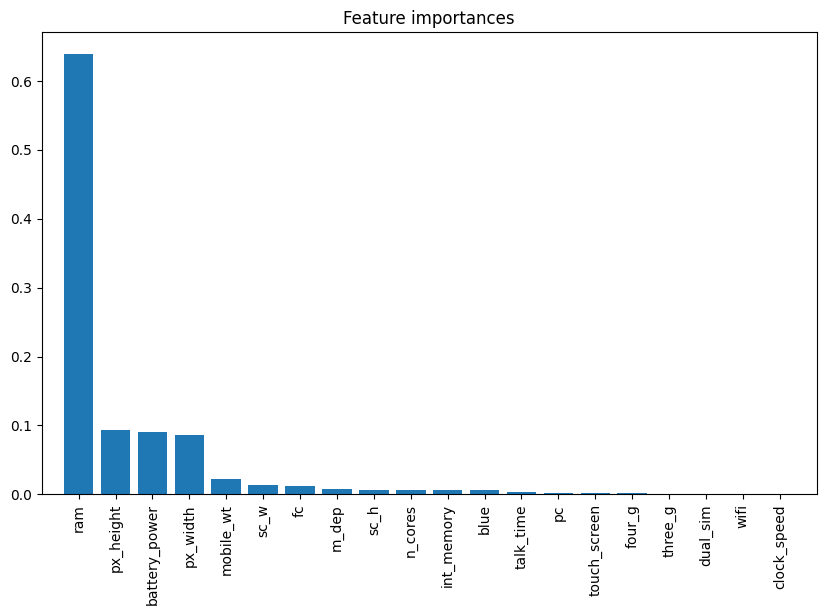

In [ ]:
import numpy as np

importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X1_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X1_train.shape[1]), np.array(X1_train.columns)[indices], rotation=90)
plt.xlim([-1, X1_train.shape[1]])
plt.show()

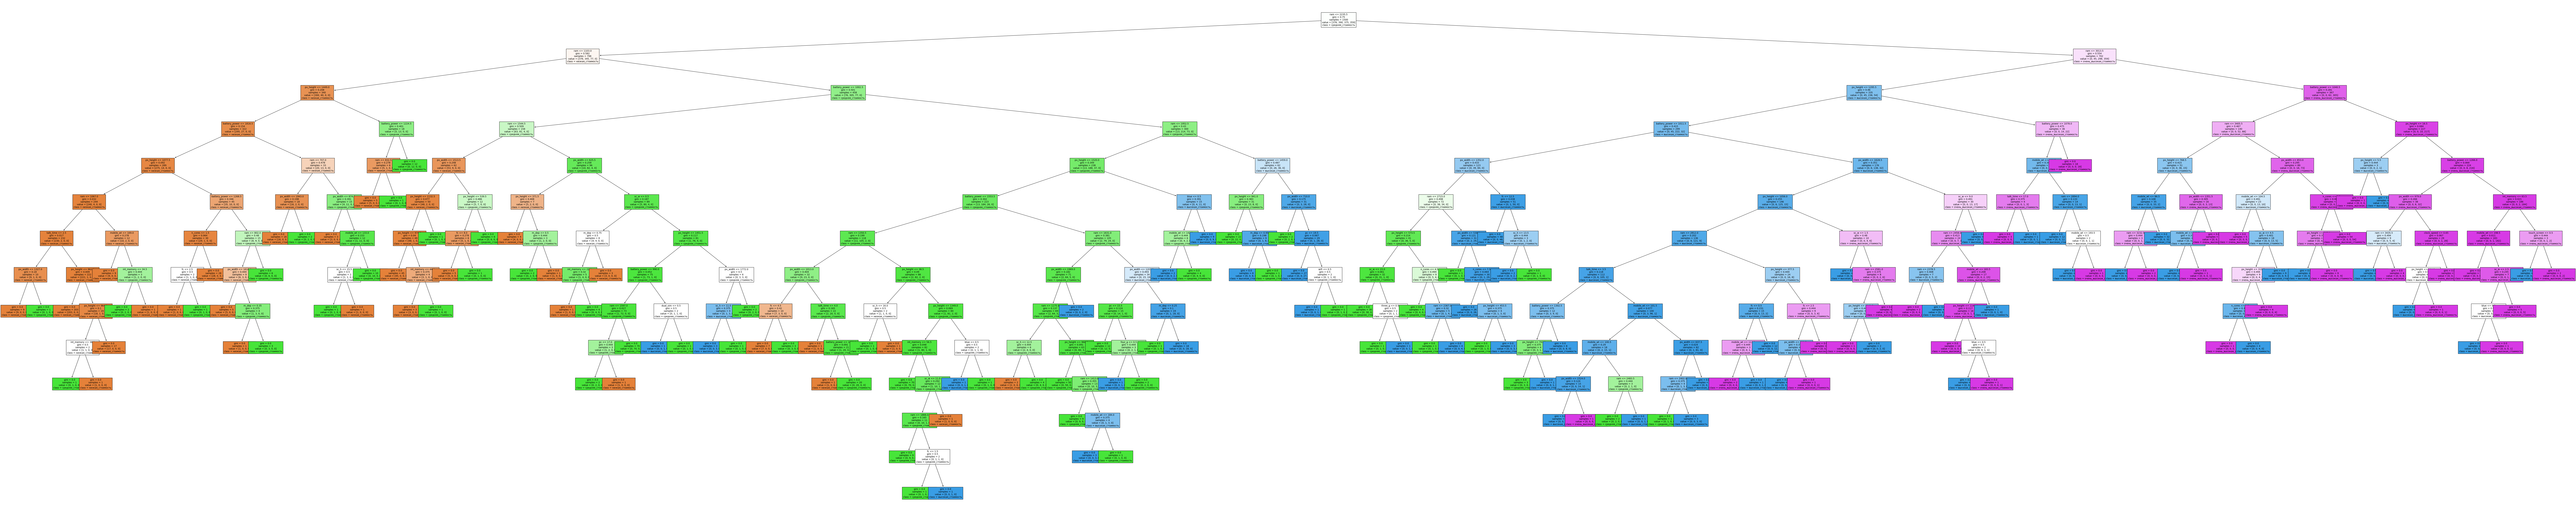

In [ ]:
plt.figure(figsize=(200, 40))
plot_tree(tree_clf, filled=True, feature_names=X1_train.columns, class_names=['низкая_стоимость', 'средняя_стоимость', 'высокая_стоимость', 'очень_высокая_cтоимость'],  fontsize=10)
plt.show()

# Cлучайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X1_train, y1_train)
rf_clf_pred_res = random_forest_classifier.predict(X1_test)
rf_clf_accuracy = accuracy_score(y1_test, rf_clf_pred_res)

print(f'sk_rf_clf accuracy: {rf_clf_accuracy}')

In [ ]:
import numpy as np

importances = random_forest_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X1_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X1_train.shape[1]), np.array(X1_train.columns)[indices], rotation=90)
plt.xlim([-1, X1_train.shape[1]])
plt.show()

# VotingClassifier


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier, ExtraTreesClassifier

estimators = [('lr', LogisticRegression(random_state=0, max_iter=1000)),
              ('dt', DecisionTreeClassifier(random_state=0)),
              ('svc', SVC(probability=True, random_state=0))]

voting_clf = VotingClassifier(estimators, voting='soft')
voting_clf.fit(X1_train, y1_train)
voting_clf_pred_res = voting_clf.predict(X1_test)
voting_clf_accuracy = accuracy_score(y1_test, voting_clf_pred_res)

print(f'voting_clf accuracy: {voting_clf_accuracy}')

In [ ]:
voting_clf = VotingClassifier(estimators, voting='hard')
voting_clf.fit(X1_train, y1_train)
voting_clf_pred_res = voting_clf.predict(X1_test)
voting_clf_accuracy = accuracy_score(y1_test, voting_clf_pred_res)

print(f'voting_clf accuracy: {voting_clf_accuracy}')

#BaggingClassifier

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=0)
bagging_clf = BaggingClassifier(estimator=dt_clf, n_estimators=100, random_state=0)
bagging_clf.fit(X1_train, y1_train)
bagging_pred_res = bagging_clf.predict(X1_test)
bagging_clf_accuracy = accuracy_score(y1_test, bagging_pred_res)

print(f'bagging_clf accuracy: {bagging_clf_accuracy}')

# GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X1_train, y1_train)

gbc_pred_res = gbc.predict(X1_test)

gbc_accuracy = accuracy_score(y1_test, gbc_pred_res)

print(f'sk_gbc accuracy: {gbc_accuracy}')


# XGBoost (Extreme Gradient Boosting)

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(seed=0)
xgbc.fit(X1_train, y1_train)


xgbc_pred_res = xgbc.predict(X1_test)

xgbc_accuracy = accuracy_score(y1_test, xgbc_pred_res)

print(f'xgbc accuracy: {xgbc_accuracy}')



# CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(random_seed=0, logging_level='Silent')
cb_clf.fit(X1_train, y1_train)


cb_clf_pred_res = cb_clf.predict(X1_test).squeeze()

cb_clf_accuracy = accuracy_score(y1_test, cb_clf_pred_res)

print(f'cb_clf accuracy: {cb_clf_accuracy}')

# LightGBM

In [ ]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt


lgb_clf = LGBMClassifier(random_state=42, verbose=-1)
lgb_clf.fit(X1_train, y1_train)

lgb_clf_pred_res = lgb_clf.predict(X1_test)


lgb_clf_accuracy = accuracy_score(y1_test, lgb_clf_pred_res)

print(f"Accuracy: {accuracy_score(y1_test, lgb_clf_pred_res):.4f}")
print(f"Precision: {precision_score(y1_test, lgb_clf_pred_res, average='weighted'):.4f}")
print(f"Recall: {recall_score(y1_test, lgb_clf_pred_res, average='weighted'):.4f}")


plot_importance(lgb_clf, max_num_features=20)
plt.show()


In [ ]:
!pip install optuna

In [ ]:
import lightgbm as lgb

def objective(trial):
    param = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3), # Шаг обучения
        'num_leaves': trial.suggest_int('num_leaves', 20, 150), # Максимальное количество листьев
        'max_depth': trial.suggest_int('max_depth', 3, 12), # Максимальная глубина дерева
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'random_state': 42,
        'verbose': -1
    }

    model = lgb.LGBMClassifier(**param)
    model.fit(X1_train, y1_train)

    y_pred = model.predict(X1_test)

    accuracy = accuracy_score(y1_test, y_pred)

    return accuracy

In [ ]:
import optuna


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

In [ ]:
lgb_clf = LGBMClassifier(learning_rate=,
                         num_leaves=,
                         max_depth=,
                         min_child_samples=,
                         random_state=42,
                         verbose=-1)

lgb_clf.fit(X1_train, y1_train)

lgb_clf_pred_res = lgb_clf.predict(X1_test)


lgb_clf_accuracy = accuracy_score(y1_test, lgb_clf_pred_res)

print(f"Accuracy: {accuracy_score(y1_test, lgb_clf_pred_res):.4f}")
print(f"Precision: {precision_score(y1_test, lgb_clf_pred_res, average='weighted'):.4f}")
print(f"Recall: {recall_score(y1_test, lgb_clf_pred_res, average='weighted'):.4f}")


plot_importance(lgb_clf)
plt.show()